In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import ssl

%matplotlib inline

In [2]:

ssl._create_default_https_context = ssl._create_unverified_context

mnist = fetch_openml('mnist_784', parser='auto')


In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

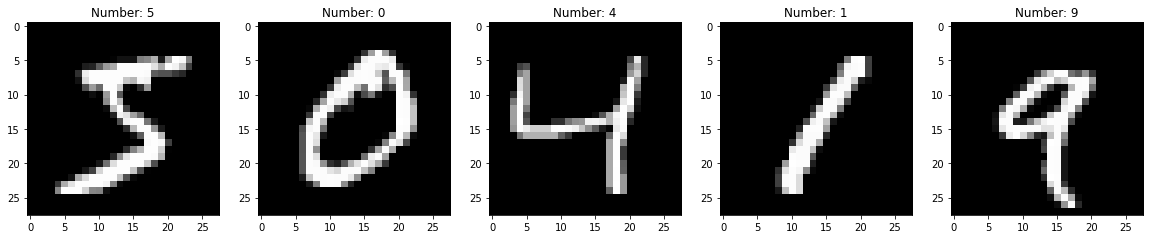

In [4]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(mnist.data.values[:5], mnist.target.values[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image,(28,28)), cmap = "gray")
    plt.title("Number: %s" % label)

In [5]:
X_train, X_test, y_train, y_test, = train_test_split(mnist.data, mnist.target, test_size = 0.2)

In [6]:
mdl = LogisticRegression(solver = 'lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9202857142857143


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
mdl.predict([X_test.iloc[0]])[0]

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0'

Prediction: 0


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


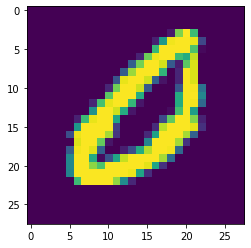

In [8]:
index = 0
plt.imshow(np.reshape(X_test.iloc[index], (28,28)))
print("Prediction: " + mdl.predict([X_test.iloc[index]])[0])

In [9]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1349,    0,    2,    6,    2,   13,    8,    3,    7,    4],
       [   1, 1578,    3,    4,    2,    3,    0,    6,   18,    7],
       [   6,   17, 1221,   31,   12,   13,   21,   24,   34,    7],
       [   5,    6,   35, 1348,    3,   32,    3,   12,   22,   17],
       [   2,    4,   11,    2, 1271,    5,   12,    3,    8,   44],
       [  10,    5,    9,   49,   14, 1052,   22,    5,   35,   15],
       [   6,    4,   18,    0,   13,    8, 1283,    1,    3,    1],
       [   4,    3,   20,   11,    8,    3,    0, 1291,    6,   54],
       [   9,   26,   17,   48,    8,   39,   16,    3, 1173,   18],
       [   6,    3,    3,   18,   33,    6,    0,   46,   10, 1318]],
      dtype=int64)

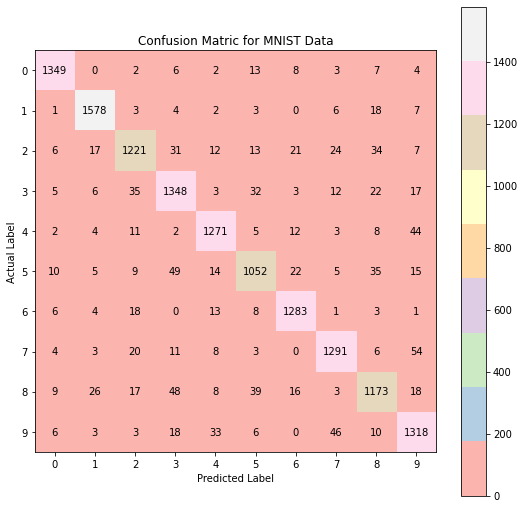

In [10]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap = "Pastel1")
plt.title("Confusion Matric for MNIST Data")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.colorbar()
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy = (y,x), horizontalalignment = 'center', verticalalignment = 'center')